In [170]:
%matplotlib inline
import numpy as np
from seaborn import plt as plt
import collections

In [3]:
def drawLine2P(x,y,xlims):
    xrange = np.arange(xlims[0],xlims[1],0.1)
    A = np.vstack([x, np.ones(len(x))]).T
    k, b = np.linalg.lstsq(A, y)[0]
    plt.plot(xrange, k*xrange + b, 'k', color="red")

In [135]:
getsign = lambda x: 1 if x >= 0 else -1

### Read Data

In [177]:
X = []
Y = []
with open("../data/data1.txt") as f:
    for line in f:
        x1, x2, c = map(float, line.split())
        X.append([x1, x2, 1]) # Adding a bias term
        Y.append(c)
X = np.array(X)
Y = np.array(Y)

### Training Voting perceptron

In [158]:
weights_dict = {}
scores_dict = {}
data = zip(X,y)
epochs = 10
update = 1

weights_dict[update] = np.zeros(3)
scores_dict[update] = 0

for epoch in xrange(epochs):
    np.random.shuffle(data)
    for x, y in data:
        if getsign(x.dot(weights_dict[update])) != y:
            weights_dict[update + 1] = weights_dict[update] + y*x
            scores_dict[update + 1] = 1
            update += 1
        else: # If correctly classified
            scores_dict[update] += 1

### For averaged perceptron

In [159]:
weight = np.zeros(3)
for key, val in weights_dict.iteritems():
    weight += val * scores_dict[key]

### Plot the decision boundary

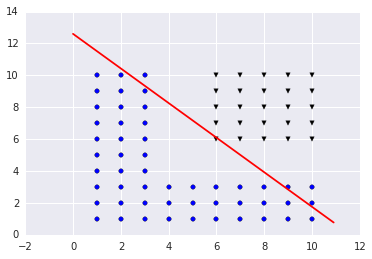

In [160]:
x_i = -weight[2] / weight[0]
y_i = -weight[2] / weight[1]
plt.scatter([x[0] for x,y in data if y==1], [x[1] for x,y in data if y==1], marker=u'o')
plt.scatter([x[0] for x,y in data if y==-1], [x[1] for x,y in data if y==-1], marker=u'v',color="black")
drawLine2P([x_i,0],[0,y_i],[0,11])

### Voting perceptron

In [161]:
def voting_prediction(x):
    """
    x: List. List of x,y coordinates
    """
    
    x = np.concatenate((x,[1]))
    return getsign(sum([scores_dict[key]*getsign(val.dot(x)) for key,val in weights_dict.iteritems()]))

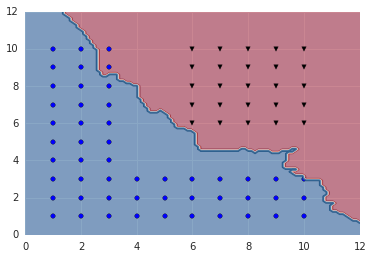

In [162]:
xx, yy = np.meshgrid(np.linspace(0, 12, 100),
                     np.linspace(0, 12, 100))
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

#plot background colors
ax = plt.gca()
Z =np.apply_along_axis(voting_prediction, axis = 1, arr = np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = ax.contourf(xx, yy, Z, cmap='RdBu', alpha=.5)
cs2 = ax.contour(xx, yy, Z, cmap='RdBu', alpha=.5)
# plt.clabel(cs2, fmt = '%2.1f', colors = 'k', fontsize=14)

# Plot the points
# ax.plot(Xtrain[ytrain == 0, 0], Xtrain[ytrain == 0, 1], 'ro', label='Class 1')
# ax.plot(Xtrain[ytrain == 1, 0], Xtrain[ytrain == 1, 1], 'bo', label='Class 2')
plt.scatter([x[0] for x,y in data if y==1], [x[1] for x,y in data if y==1], marker=u'o')
plt.scatter([x[0] for x,y in data if y==-1], [x[1] for x,y in data if y==-1], marker=u'v',color="black")
# make legend
plt.legend(loc='upper left', scatterpoints=1, numpoints=1)

### Short Term Memory Perceptron (STMP)

In [174]:
L = 20
weights_dict = collections.deque(maxlen=L)
scores_dict = collections.deque(maxlen=L)
data = zip(X,y)
epochs = 20
update = 1

weights_dict.append(np.zeros(3))
scores_dict.append(0)

for epoch in xrange(epochs):
    np.random.shuffle(data)
    for x, y in data:
        if getsign(x.dot(weights_dict[-1])) != y:
            weights_dict.append(weights_dict[-1] + y*x)
            scores_dict.append(1)
            update += 1
        else: # If correctly classified
            scores_dict[-1] += 1

In [175]:
def voting_prediction_STMP(x):
    """
    x: List. List of x,y coordinates
    """
    
    x = np.concatenate((x,[1]))
    return getsign(sum([scores_dict[key]*getsign(val.dot(x)) for key,val in enumerate(weights_dict)]))

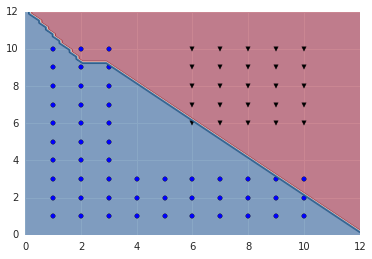

In [176]:
xx, yy = np.meshgrid(np.linspace(0, 12, 100),
                     np.linspace(0, 12, 100))
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

#plot background colors
ax = plt.gca()
Z =np.apply_along_axis(voting_prediction_STMP, axis = 1, arr = np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = ax.contourf(xx, yy, Z, cmap='RdBu', alpha=.5)
cs2 = ax.contour(xx, yy, Z, cmap='RdBu', alpha=.5)
# plt.clabel(cs2, fmt = '%2.1f', colors = 'k', fontsize=14)

# Plot the points
# ax.plot(Xtrain[ytrain == 0, 0], Xtrain[ytrain == 0, 1], 'ro', label='Class 1')
# ax.plot(Xtrain[ytrain == 1, 0], Xtrain[ytrain == 1, 1], 'bo', label='Class 2')
plt.scatter([x[0] for x,y in data if y==1], [x[1] for x,y in data if y==1], marker=u'o')
plt.scatter([x[0] for x,y in data if y==-1], [x[1] for x,y in data if y==-1], marker=u'v',color="black")
# make legend
plt.legend(loc='upper left', scatterpoints=1, numpoints=1)

### Averaged Perceptron

In [183]:
running_sum = np.zeros(3)
data = zip(X,Y)
epochs = 10
weight = np.zeros(3)
score = 0

for epoch in xrange(epochs):
    np.random.shuffle(data)
    for x, y in data:
        if getsign(x.dot(weight)) != y:
            running_sum += score * weight
            weight= weight + y*x
            score = 1

        else: # If correctly classified
            score += 1

In [184]:
def average_voting_prediction(x):
    """
    x: List. List of x,y coordinates
    """
    
    x = np.concatenate((x,[1]))
    if weight.dot(x) >= 0:
        return 1
    else:
        return -1

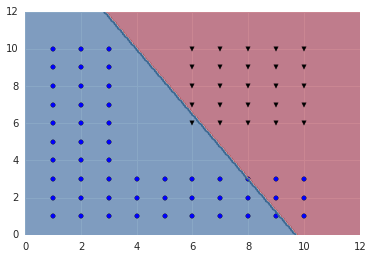

In [185]:
xx, yy = np.meshgrid(np.linspace(0, 12, 200),
                     np.linspace(0, 12, 200))
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

#plot background colors
ax = plt.gca()
Z =np.apply_along_axis(average_voting_prediction, axis = 1, arr = np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = ax.contourf(xx, yy, Z, cmap='RdBu', alpha=.5)
cs2 = ax.contour(xx, yy, Z, cmap='RdBu', alpha=.5)
# plt.clabel(cs2, fmt = '%2.1f', colors = 'k', fontsize=14)

# Plot the points
# ax.plot(Xtrain[ytrain == 0, 0], Xtrain[ytrain == 0, 1], 'ro', label='Class 1')
# ax.plot(Xtrain[ytrain == 1, 0], Xtrain[ytrain == 1, 1], 'bo', label='Class 2')
plt.scatter([x[0] for x,y in data if y==1], [x[1] for x,y in data if y==1], marker=u'o')
plt.scatter([x[0] for x,y in data if y==-1], [x[1] for x,y in data if y==-1], marker=u'v',color="black")
# make legend
plt.legend(loc='upper left', scatterpoints=1, numpoints=1)

### Kernelized Perceptron (Dual form)

In [220]:
def quad_kernel(x, y):
    return np.square(1 + x.dot(y))

def rbf_kernel(x, y, sigma = .1):
    z = x-y
    return np.exp(z.dot(z)/ 2.0 / sigma**2)

In [211]:
data = zip(X,Y)
np.random.shuffle(data)

epochs = 10
weight = collections.defaultdict(lambda: 0)
score = 0

for epoch in xrange(epochs):
    all_correct = True
    for index, (x, y) in enumerate(data):
        sigma = 0
        for key, val in weight.iteritems():
            sigma += data[key][1] * val * quad_kernel(data[key][0], x)
        if y * sigma < 0 or len(weight) == 0:
            weight[index] += 1
            all_correct = False
    if all_correct == True:
        print "Trained! in epochs", epoch
        break

Trained! in epochs 4


In [215]:
def quad_kernel_prediction(x):
    """
    x: List. List of x,y coordinates
    """
    sigma = 0
    x = np.concatenate((x,[1]))
    for key, val in weight.iteritems():
        sigma += data[key][1] * val * quad_kernel(data[key][0], x)
    return getsign(sigma)

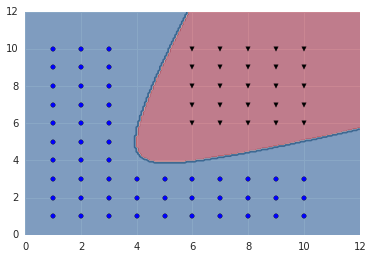

In [216]:
xx, yy = np.meshgrid(np.linspace(0, 12, 200),
                     np.linspace(0, 12, 200))
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

#plot background colors
ax = plt.gca()
Z =np.apply_along_axis(quad_kernel_prediction, axis = 1, arr = np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = ax.contourf(xx, yy, Z, cmap='RdBu', alpha=.5)
cs2 = ax.contour(xx, yy, Z, cmap='RdBu', alpha=.5)
# plt.clabel(cs2, fmt = '%2.1f', colors = 'k', fontsize=14)

# Plot the points
# ax.plot(Xtrain[ytrain == 0, 0], Xtrain[ytrain == 0, 1], 'ro', label='Class 1')
# ax.plot(Xtrain[ytrain == 1, 0], Xtrain[ytrain == 1, 1], 'bo', label='Class 2')
plt.scatter([x[0] for x,y in data if y==1], [x[1] for x,y in data if y==1], marker=u'o')
plt.scatter([x[0] for x,y in data if y==-1], [x[1] for x,y in data if y==-1], marker=u'v',color="black")
# make legend
plt.legend(loc='upper left', scatterpoints=1, numpoints=1)

In [277]:
data = zip(X,Y)
np.random.shuffle(data)

epochs = 20
weight = collections.defaultdict(lambda: 0)
score = 0

for epoch in xrange(epochs):
    all_correct = True
    for index, (x, y) in enumerate(data):
        sigma = 0
        for key, val in weight.iteritems():
            sigma += data[key][1] * val * rbf_kernel(data[key][0], x, .159)
        if y * sigma < 0 or len(weight) == 0:
            weight[index] += 1
            all_correct = False
    if all_correct == True:
        print "Trained! in epochs", epoch
        break

In [279]:
def rbf_kernel_prediction(x):
    """
    x: List. List of x,y coordinates
    """
    sigma = 0
    x = np.concatenate((x,[1]))
    for key, val in weight.iteritems():
        sigma += data[key][1] * val * rbf_kernel(data[key][0], x, .159)
    return getsign(sigma)

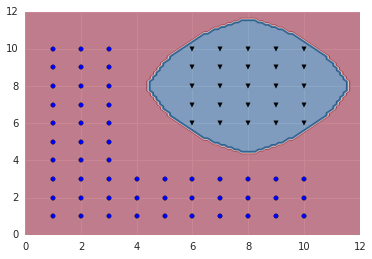

In [280]:
xx, yy = np.meshgrid(np.linspace(0, 12, 100),
                     np.linspace(0, 12, 100))
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

#plot background colors
ax = plt.gca()
Z =np.apply_along_axis(rbf_kernel_prediction, axis = 1, arr = np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = ax.contourf(xx, yy, Z, cmap='RdBu', alpha=.5)
cs2 = ax.contour(xx, yy, Z, cmap='RdBu', alpha=.5)
# plt.clabel(cs2, fmt = '%2.1f', colors = 'k', fontsize=14)

# Plot the points
# ax.plot(Xtrain[ytrain == 0, 0], Xtrain[ytrain == 0, 1], 'ro', label='Class 1')
# ax.plot(Xtrain[ytrain == 1, 0], Xtrain[ytrain == 1, 1], 'bo', label='Class 2')
plt.scatter([x[0] for x,y in data if y==1], [x[1] for x,y in data if y==1], marker=u'o')
plt.scatter([x[0] for x,y in data if y==-1], [x[1] for x,y in data if y==-1], marker=u'v',color="black")
# make legend
plt.legend(loc='upper left', scatterpoints=1, numpoints=1)